In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")



## 1.Business Understanding

## Hypothesis 

## 2.Data Understanding

In [2]:
## Loading dataset

data= pd.read_csv("Desktop/Pandas/Sepsis/Paitients_Files_Train.csv")

data_test= pd.read_csv("Desktop/Pandas/Sepsis/Paitients_Files_Test.csv")


In [3]:
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
data_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


### 2.1 Checking Data information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
## there are no missing values; however, Sepsis feature is mispelt as 'Sepssis'; therefore, we will go ahead and rename it 

data.rename(columns= {"Sepssis":"Sepsis"}, inplace= True)

In [8]:
data.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepsis'],
      dtype='object')

### 2.2 Getting a Describtion of My Dataset

In [9]:
data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2.3 Univariate Analysis 

#### 2.3.1 Histogram

array([[<Axes: title={'center': 'PRG'}>, <Axes: title={'center': 'PL'}>,
        <Axes: title={'center': 'PR'}>],
       [<Axes: title={'center': 'SK'}>, <Axes: title={'center': 'TS'}>,
        <Axes: title={'center': 'M11'}>],
       [<Axes: title={'center': 'BD2'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Insurance'}>]], dtype=object)

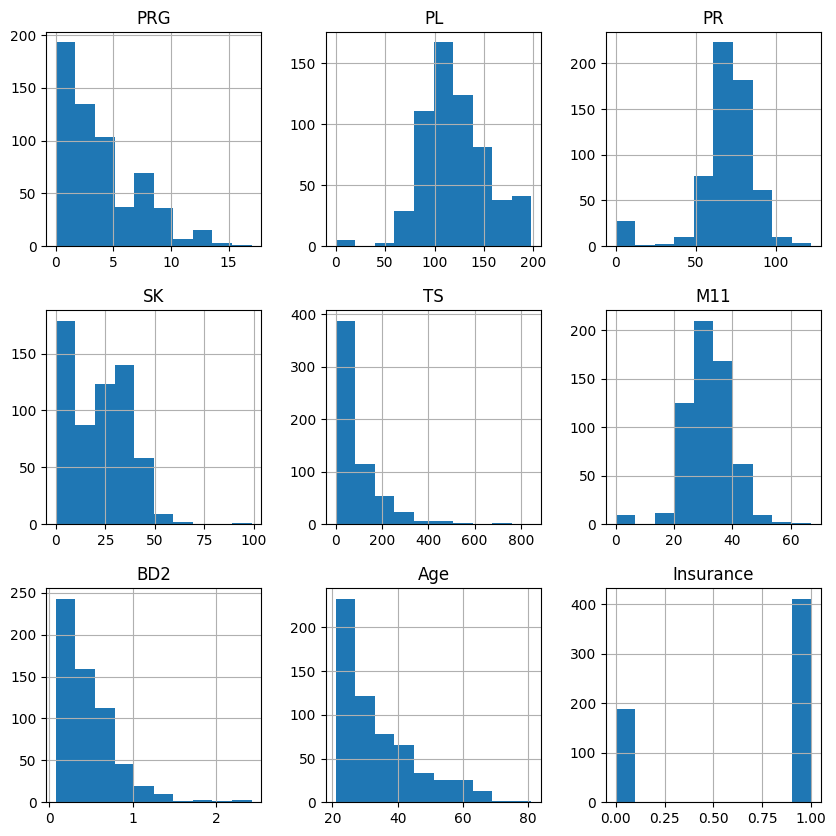

In [10]:
data.hist(figsize= (10,10))

#### 2.3.2 Visualizing Outliers 

<Axes: >

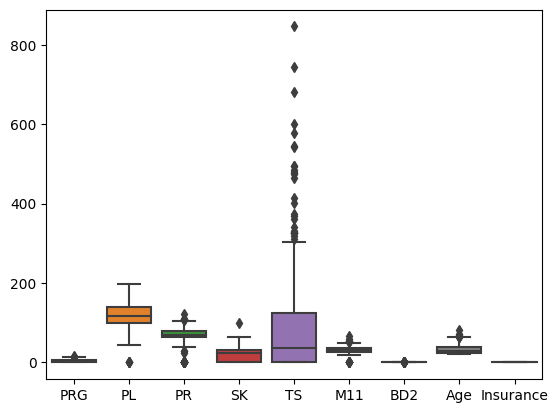

In [11]:
sns.boxplot(data=data)

#### Notes: 

there are some outliers; therefore we will:

- Use an algorithm robust to outliers 
- For algorithms that are not robust to outliers, we will use L1 regularization to minimize the effect of the outliers. 


#### 2.3.3 Visualizing Label

<Axes: xlabel='Sepsis', ylabel='count'>

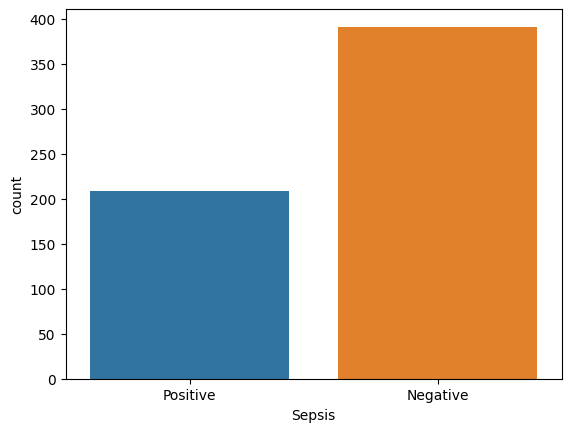

In [12]:
sns.countplot(data= data, x= data['Sepsis'])

#### Notes:

- There is relatively a low class imbalance 

### 2.4 Bivariate Analysis 

#### I am just going to paste the metadata to help me understand 


- PRG Plasma glucose
- PL Blood Work Result-1 (mu U/ml)
- PR Blood Pressure (mm Hg)
- SK Blood Work Result-2 (mm)
- TS Blood Work Result-3 (mu U/ml)
- M11 Body mass index (weight in kg/(height in m)^2
- BD2 Blood Work Result-4 (mu U/ml)
- Age patients age (years)
- Insurance If a patient holds a valid insurance card
- Sepssis Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

#### 2.4.1 Outlier Analysis 

In [13]:
##there are a lot of features outliers; therefore, it might be a good idea to see how these feature vary with the label (Sepsis)

In [17]:
##Let's see how blood work varies with Sepsis

for  col in data.drop(['ID',"Insurance", "SK", 'Sepsis'], axis= 1):
    fig= px.box(data_frame=data, color= "Sepsis", y= col, title= f"Relationship of {col}, with respect to Sepsis")
    fig.show()

#### Notes:

- There were some people with very high Plasma Glucose even though they didn't have Sepsis 
- 